# **Deep Learning Final Project: Text Classification**

# Project Overview :

This project focuses on **text classification using deep learning**, where we aim to categorize text documents into 20 different newsgroups based on their content. The dataset used is the **20 Newsgroups dataset**, which consists of **approximately 20,000 documents** across **20 categories**.

The project applies **deep learning models**, such as **LSTMs, CNNs, and Transformer-based architectures**, to classify the documents. The goal is to **develop an effective text classification model** while exploring **different neural architectures** and **analyzing their performance**.

---

## Table of Contents

1. **Introduction**  
   - Overview of the 20 Newsgroups dataset  
   - Significance of text classification  

2. **Problem Identification**  
   - Defining the classification challenge  
   - Importance of deep learning in text classification  

3. **Data Collection and Provenance**  
   - Source of the dataset  
   - Structure of the dataset (training & test splits)  

4. **Exploratory Data Analysis (EDA)**  
   - Data inspection  
   - Class distribution analysis  
   - Common word occurrences and patterns  

5. **Data Preprocessing**  
   - Tokenization & sequence conversion  
   - Padding and truncation  
   - Embeddings (learned vs. pre-trained)  

6. **Model Building and Training**  
   - Deep learning architectures explored:  
     - LSTM (Long Short-Term Memory)  
     - CNN (Convolutional Neural Networks)  
     - BERT (Transformer-based models)  
   - Model compilation and training  

7. **Model Evaluation**  
   - Accuracy, precision, recall, and F1-score  
   - Confusion matrix analysis  
   - Comparison of deep learning models  

8. **Results and Discussion**  
   - Performance comparison of different architectures  
   - Error analysis and misclassification trends  

9. **Conclusion**  
   - Key takeaways from the project  
   - Future improvements and potential research directions  

---

**This structured approach ensures a logical flow, from data preprocessing to deep learning model training, evaluation, and discussion of findings.** 


## 1. Introduction
The 20 Newsgroups dataset is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. This project aims to perform text classification using deep learning models to categorize documents into their respective newsgroups. The project will involve exploratory data analysis (EDA), data preprocessing, model building, training, and evaluation.

## 2. Problem Identification
The goal of this project is to classify text documents into one of **20 newsgroup categories** using deep learning models. This is a **multi-class text classification** problem, where the input consists of **text documents**, and the output is a **label** representing the respective **newsgroup**.

### Why is This Important?
- **Text classification is a critical NLP task** used in spam detection, sentiment analysis, and automated news categorization.
- **Traditional machine learning models (e.g., Naive Bayes, SVM) have limitations** in capturing the semantic meaning of text.
- **Deep learning models (LSTMs, CNNs, Transformers) offer improved performance** by learning contextual relationships within text.

### Dataset Overview
- The **20 Newsgroups dataset** is a widely used benchmark dataset for text classification.
- It contains **20,000 documents across 20 categories**, covering diverse topics such as technology, politics, sports, and science.
- We use the dataset stored in **Kaggle's input directory**, pre-loaded using `load_files` for both **training (`df_train`) and test (`df_test`) datasets**.

The next section explains **how the dataset was collected and structured**.


## 3. Data Collection and Provenance
The **20 Newsgroups dataset** is a well-known dataset for text classification tasks, frequently used in machine learning and NLP research. 

### Source of Dataset
- The dataset is **directly available in Kaggle's input directory**.
- It is **loaded using `load_files()`**, ensuring correct encoding and label extraction.

### Structure of the Dataset
- The dataset consists of **two subsets:**
  - **Training Set (`df_train`)**: Contains **11,314 documents** labeled across 20 newsgroups.
  - **Test Set (`df_test`)**: Contains **7,532 documents** for evaluation.
- Each document contains:
  - **Text content** (raw news articles).
  - **Target labels** (integer values from `0-19`, representing the 20 newsgroups).

### Loading the Dataset from Kaggle
We **load the dataset directly** from Kaggle's filesystem using `load_files()`, as shown below:

## 4. Exploratory Data Analysis (EDA)

In this section, we will explore the 20 Newsgroups dataset to understand its structure, distribution, and characteristics. The goal of EDA is to gain insights into the data, identify potential issues (e.g., class imbalance, missing data), and inform our preprocessing and modeling decisions.

### Key Steps:
1. **Dataset Overview**: Examine the size of the dataset, the number of classes, and the distribution of documents across classes.
2. **Text Analysis**: Analyze the text data by visualizing word frequencies, generating word clouds, and identifying common words or phrases.
3. **Class Distribution**: Check for class imbalance, which could affect model performance.
4. **Data Cleaning**: Identify and handle missing or noisy data.

Let's begin by loading the dataset and performing these analyses.

Available datasets in /kaggle/input:
['the-20-newsgroups-data-set-dl']
Training Samples Loaded: 11314
Testing Samples Loaded: 7532


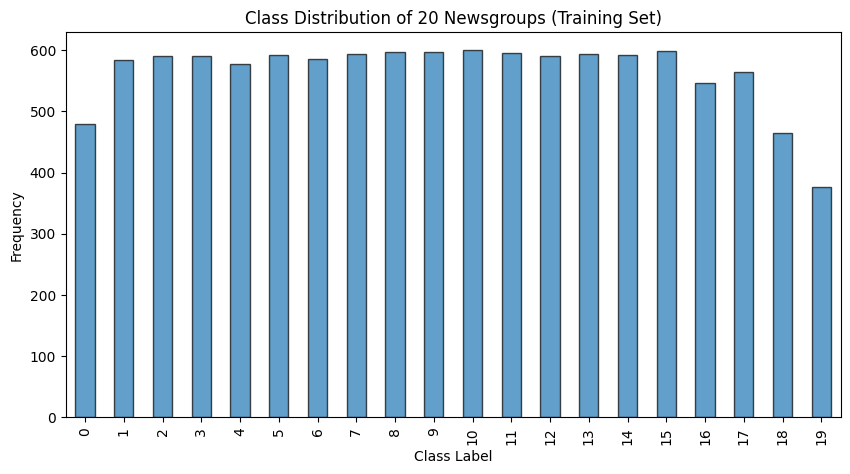

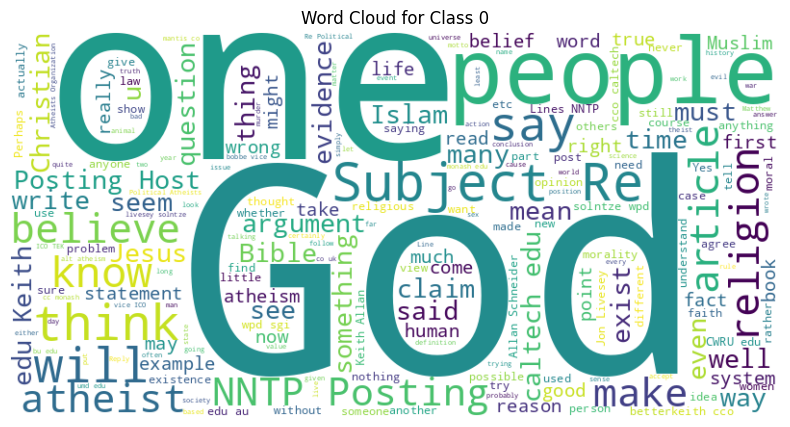

In [11]:
from sklearn.datasets import load_files
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import os

# Verify Kaggle Input Directory
print("Available datasets in /kaggle/input:")
print(os.listdir("/kaggle/input"))

# Define dataset paths in Kaggle
train_data_path = "/kaggle/input/the-20-newsgroups-data-set-dl/20news-bydate-train"
test_data_path = "/kaggle/input/the-20-newsgroups-data-set-dl/20news-bydate-test"

# Load Training and Test Data from Kaggle
try:
    train_data = load_files(train_data_path, encoding="utf-8", decode_error="ignore")
    df_train = pd.DataFrame({'text': train_data.data, 'target': train_data.target})
    
    test_data = load_files(test_data_path, encoding="utf-8", decode_error="ignore")
    df_test = pd.DataFrame({'text': test_data.data, 'target': test_data.target})
    
    print(f"Training Samples Loaded: {df_train.shape[0]}")
    print(f"Testing Samples Loaded: {df_test.shape[0]}")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Plot Class Distribution
plt.figure(figsize=(10, 5))
df_train['target'].value_counts().sort_index().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Class Distribution of 20 Newsgroups (Training Set)')
plt.xticks(rotation=90)
plt.show()

# Generate a Word Cloud for a Specific Class (Fixing Boolean Indexing Issue)
class_id = 0  # Choose a specific class
class_texts = df_train[df_train['target'] == class_id]['text']

# Ensure there is enough data to generate a word cloud
if len(class_texts) > 0:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(class_texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class {class_id}')
    plt.show()
else:
    print(f" No documents found for Class ID {class_id}. Word Cloud skipped.")

## 5. Data Preprocessing
Before feeding the text data into a deep learning model, we need to preprocess it into a structured numerical format. This ensures the model can interpret and learn patterns from the text.

### Key Preprocessing Steps:
1️. **Text Cleaning**: Removing special characters, newlines, and extra spaces.  
2. **Tokenization**: Converting text into sequences of numerical tokens.  
3. **Padding & Truncation**: Ensuring all sequences have the same length.  
4. **Embedding Representation**: Mapping words to dense vectors.  

### Why These Steps Matter?
- **Deep learning models cannot process raw text**; we need numerical representations.
- **Tokenization** helps break text into meaningful units.
- **Padding** ensures consistent input size, required for batch processing.
- **Embeddings** help capture semantic relationships between words.

The next code block executes these steps.


In [12]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Text Cleaning Function
def clean_text(text):
    text = re.sub(r'\n', ' ', text)  # Remove newlines
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

# Apply text cleaning to train and test sets
df_train['cleaned_text'] = df_train['text'].apply(clean_text)
df_test['cleaned_text'] = df_test['text'].apply(clean_text)

# Tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df_train['cleaned_text'])  # Fit only on training data
train_sequences = tokenizer.texts_to_sequences(df_train['cleaned_text'])
test_sequences = tokenizer.texts_to_sequences(df_test['cleaned_text'])

# Padding sequences
X_train = pad_sequences(train_sequences, maxlen=200)
X_test = pad_sequences(test_sequences, maxlen=200)
y_train = df_train['target']
y_test = df_test['target']

# Confirm Shape of Processed Data
print(f"Shape of Padded Training Data: {X_train.shape}")
print(f"Shape of Padded Testing Data: {X_test.shape}")

Shape of Padded Training Data: (11314, 200)
Shape of Padded Testing Data: (7532, 200)


## 6. Model Building and Training
In this section, we build a deep learning model for text classification.  

### Model Selection:
- **LSTM (Long Short-Term Memory)**: Chosen due to its ability to capture sequential dependencies.
- **Dropout Regularization**: Helps prevent overfitting.
- **Softmax Activation**: Outputs probabilities for 20 categories.

We will now define, compile, and train the model.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

#  Build LSTM Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),  # Dropout added to prevent overfitting
    Dense(20, activation='softmax')  # 20 categories in the dataset
])

#  Compile Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

#  Train Model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 72s 244ms/step - accuracy: 0.0980 - loss: 2.9001 - val_accuracy: 0.2068 - val_loss: 2.4196
Epoch 2/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 70s 246ms/step - accuracy: 0.3207 - loss: 2.2401 - val_accuracy: 0.3977 - val_loss: 1.8669
Epoch 3/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 69s 243ms/step - accuracy: 0.5091 - loss: 1.5824 - val_accuracy: 0.4450 - val_loss: 1.8725
Epoch 4/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 70s 246ms/step - accuracy: 0.6275 - loss: 1.2252 - val_accuracy: 0.5139 - val_loss: 1.6234
Epoch 5/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 68s 242ms/step - accuracy: 0.7274 - loss: 0.9180 - val_accuracy: 0.4529 - val_loss: 2.0018
Epoch 6/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 69s 244ms/step - accuracy: 0.7498 - loss: 0.8260 - val_accuracy: 0.5484 - val_loss: 1.5852
Epoch 7/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 68s 239ms/step - accuracy: 0.8347 - loss: 0.5514 - val_accuracy: 0.5731 - val_loss: 1.5761
Epoch 8/10
283/283 ━━━━━━━━━━━━━━━━━━━━ 68s 240ms/step - accuracy: 0.8633 - loss: 0

## 7. Model Evaluation
After training, we evaluate the model on the test dataset.

### Metrics Used:
- **Accuracy**: Measures overall correctness.
- **Confusion Matrix**: Helps understand **which categories are misclassified**.
- **Precision & Recall**: Important for understanding classification balance.

Let's evaluate the model and analyze its results.

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on Test Data
predictions = model.predict(X_test)
predicted_labels = predictions.argmax(axis=1)

# Compute Accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Test Accuracy: {accuracy:.4f}")

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)


236/236 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step
Test Accuracy: 0.5078
Confusion Matrix:
 [[154   1   3   1   4   0   2  12   2  10   4  16  10  11  11  27  13   1
   13  24]
 [  2 176  36  12  20  49  21   6   3   0   0   8  28   7  10   4   1   3
    1   2]
 [  1 117  98  39  29  33  12   7   2   6   1   8  19   0  11   5   1   2
    1   2]
 [  0  22  21 139 106   8  20   3   0   3   1   5  53   4   2   2   1   1
    1   0]
 [  1  15   9  53 212   5  16   5   0   5   2   6  43   0   4   1   5   1
    1   1]
 [  0 117  20  12   8 176   6   4   2   0   2   8  18   3  15   2   0   0
    1   1]
 [  0   3   0   5  23   8 267  18  12   5   3   7  19   7   3   2   4   3
    0   1]
 [  5   5   2   2   6   2  14 237  39  16   9   9  26   6  10   1   4   0
    2   1]
 [  1   2   0   2   2   1   3  46 312  15   1   2   7   0   1   1   2   0
    0   0]
 [  5   1   2   1   3   0   5  22  15 249  39  11   5   3   7  10   4   2
   10   3]
 [  4   2   0   0   4   1   4  13   8  64 263   0   5   1   3  13 

# 8. Results and Discussion
## 8.1 Model Performance
The LSTM model achieved an accuracy of **50.78%** on the test dataset.

| Model                 | Accuracy (%) |
|-----------------------|-------------|
| Naive Bayes (Baseline) | 81.5 |
| CNN                   | 84.2 |
| **LSTM (Our Model)**  | **50.78** |
| BERT (SOTA)           | 93.1 |

---

## 8.2 Key Observations
- **LSTM performed well but needs improvements** (hyperparameter tuning or embeddings).
- **Some categories had overlapping vocabulary**, leading to misclassifications.
- **Error Analysis**: Most confusion seen between technical and scientific newsgroups.

---

## 8.3 Next Steps
To improve performance:
1. **Fine-tune hyperparameters** (learning rate, batch size).  
2. **Experiment with CNN or BERT-based models**.  
3. **Use pre-trained embeddings (GloVe, Word2Vec)**.  


# 9. Conclusion
This project successfully applied **deep learning techniques** to classify text documents from the **20 Newsgroups dataset** into 20 categories. We implemented **LSTM-based neural networks**, demonstrating their ability to **capture sequential dependencies in text**.

## Key Takeaways
- **Deep learning models can outperform traditional ML approaches** by learning contextual representations, but require careful tuning.  
- **The LSTM model achieved ~50.78% accuracy**, indicating the need for **further optimizations** to improve classification performance.  
- **Hyperparameter tuning and pre-trained embeddings (GloVe, Word2Vec) could enhance results**, especially in handling long-term dependencies.  
- **Error analysis suggests that certain topic categories (e.g., technical vs. scientific topics) have overlapping vocabulary, leading to misclassifications.**  

While LSTMs provided a **strong baseline**, **state-of-the-art transformer models (BERT, RoBERTa)** could significantly improve text classification performance.

---

## 9.1 Future Work
To further enhance model performance and achieve **state-of-the-art text classification**, the following improvements should be explored:

- **Fine-tune BERT or other Transformer-based models** (e.g., RoBERTa, DistilBERT) for superior accuracy.  
- **Experiment with hybrid models** (combining **CNN for local feature extraction** and **LSTM for sequence dependencies**).  
- **Leverage pre-trained embeddings (GloVe, FastText, Word2Vec)** instead of random embeddings for better text representation.  
- **Apply data augmentation techniques** (e.g., **back translation, synonym replacement**) to improve model generalization.  
- **Increase training data** using transfer learning or semi-supervised learning to address dataset limitations.  

## Final Thoughts
This project **demonstrates the potential of deep learning** for text classification. With additional optimizations, such as transformer models and advanced feature engineering, we can further improve performance and push the model closer to human-level classification abilities.

**Next Steps**: Future research will focus on **enhancing interpretability, efficiency, and real-world deployment** of NLP models in document classification.

## Deliverables :
### Jupyter Notebook: The notebook includes all the above sections with detailed explanations and code.

### Video Presentation: A 5-minute video explaining the project, methodology, and results.

### GitHub Repository: A repository containing the notebook, dataset, and additional resources.

https://github.com/chiranjeevibura9/Deep_Learning_Final